# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from ddpg_agent import Agent
import copy

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.10000000149011612
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0.5)

In [22]:
####MULTIAGENT DEEP DETERMINISTIC POLICY GRADIENT LEARNING###########

def maddpg(n_episodes=3000, max_t=1000):
    """Multi-Agent Deep Deterministic Policy Gradient Learning.
    """
    scores_deque = deque(maxlen=100)
    print_every = 100
    total = []
    aver_scores = []
    
    
    for episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]       # RESET
        states = env_info.vector_observations                   # GET STATE
        agent.reset()                                           
        scores = np.zeros(num_agents)                          
        
        for t in range(max_t):
            actions = agent.act(states)                         # select an action
            env_info = env.step(actions)[brain_name]            # send actions to environment
            next_states = env_info.vector_observations          # GET NEXT STATE
            rewards = env_info.rewards                          # Reward
            dones = env_info.local_done                         # TEST FINISHED
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states                               
            scores += rewards                                   # update the score
            if np.any(dones):                                   # EXIT
                break 
        
        ####SCORES#####
        
        scores_deque.append(np.max(scores))                     # SAVE SCORE
        total.append(np.max(scores))                            
        aver_scores.append(np.mean(scores_deque))               # SAVE THE AVERAGE SCORE
        
        
        print('\rEpisode {}\tAverage Score: {:.3f}'.format(episode, np.mean(scores_deque), end=""))
              
        if (episode % print_every) == 0:
            print('\rEpisode {}\tAverage Score: {:.3f}'.format(episode, np.mean(scores_deque)))
        
        #######environment solved and saved chekpoints###########
              
        if np.mean(scores_deque)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode-100, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'check_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'check_critic.pth')
            break
    
    return total, aver_scores


scores, aver_scores = maddpg()


Episode 1	Average Score: 0.100
Episode 2	Average Score: 0.100
Episode 3	Average Score: 0.100
Episode 4	Average Score: 0.100
Episode 5	Average Score: 0.080
Episode 6	Average Score: 0.083
Episode 7	Average Score: 0.071
Episode 8	Average Score: 0.063
Episode 9	Average Score: 0.056
Episode 10	Average Score: 0.059
Episode 11	Average Score: 0.063
Episode 12	Average Score: 0.058
Episode 13	Average Score: 0.061
Episode 14	Average Score: 0.064
Episode 15	Average Score: 0.065
Episode 16	Average Score: 0.061
Episode 17	Average Score: 0.063
Episode 18	Average Score: 0.064
Episode 19	Average Score: 0.061
Episode 20	Average Score: 0.058
Episode 21	Average Score: 0.055
Episode 22	Average Score: 0.057
Episode 23	Average Score: 0.063
Episode 24	Average Score: 0.064
Episode 25	Average Score: 0.066
Episode 26	Average Score: 0.067
Episode 27	Average Score: 0.064
Episode 28	Average Score: 0.066
Episode 29	Average Score: 0.067
Episode 30	Average Score: 0.068
Episode 31	Average Score: 0.066
Episode 32	Averag

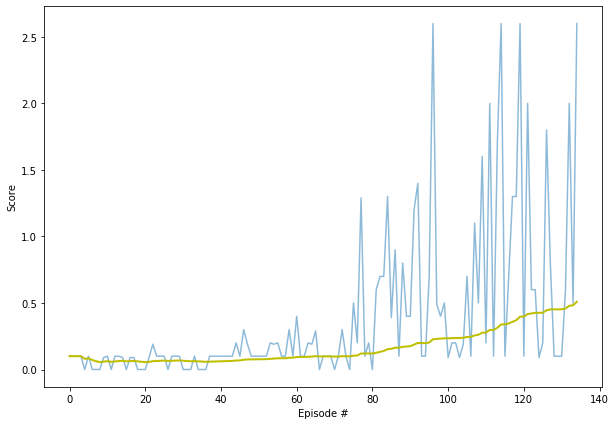

In [23]:
# plot the score over episodes
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, alpha=0.5)
plt.plot(np.arange(len(scores)), aver_scores, linewidth=2, c='y')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [24]:
env.close()